In [1]:
import neat
import os
import evogym.envs
from evogym import is_connected, has_actuator, get_full_connectivity, hashable
import numpy as np
from pathos.multiprocessing import ProcessPool
import errno
import dill
import sys
sys.path.append('../')

import neat
from hyperneat.new_hyperNEAT import create_phenotype_network
from hyperneat.substrate import Substrate
from hyperneat.visualize import draw_net

import itertools as it
import time
import imageio

import sgr_main as sgr
from matplotlib import pyplot as plt


from substrates import morph_substrate, control_substrate
from generate_robot import generate_robot
from evogym_sim import simulate_env

In [2]:
def get_robot(genome, params, neat_config):
    cppn = neat.nn.FeedForwardNetwork.create(genome, neat_config)

    design_substrate = morph_substrate(params)
    design_net = create_phenotype_network(cppn, design_substrate)

    robot = generate_robot(design_net, params)
    if not sgr.eval_genome_constraint(robot):
        return robot, None
    connections = get_full_connectivity(robot)
    env = evogym.envs.gym.make(params["env"], body=robot, connections=connections)
    img = env.render(mode='img')
    env.close()
    return robot, img

In [11]:
ENV = "Carrier-v1" # env_names = ["CaveCrawler-v0", "UpStepper-v0", "ObstacleTraverser-v1"]
STEPS = 600
ROBOT_SIZE = 5
POP = 128

directory = "results/" + ENV

file = "run_alt_1_pop.pkl"
defaultGen = neat.DefaultGenome
f = lambda self, other, config: new_distance(params, morph_substrate(params), generate_robot, self, other, config)
defaultGen.distance = f
params = {"robot_size": ROBOT_SIZE, "env": ENV, "steps": STEPS, "pop_size": POP, "robot_substrate": "AA"}
neat_config = neat.config.Config(
    defaultGen,
    neat.reproduction.DefaultReproduction, 
    neat.species.DefaultSpeciesSet, 
    neat.stagnation.DefaultStagnation, 
    "../configs/hyperNEAT_CPPN_robot.cfg"
)

with open(f"../{directory}/{file}", "rb") as file:
    pop = dill.load(file)
champion = pop.best_genome
print(champion.fitness)

UnpicklingError: [Errno 2] No such file or directory: 'results/Carrier-v1/run_alt_1_out.txt'

!!!!!!!!!!!!!!!!!!!!!!!! Specie  273 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  266 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  268 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  269 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  267 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  249 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  257 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  238 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  259 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  271 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  276 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  262 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  275 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  228 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  231 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! 

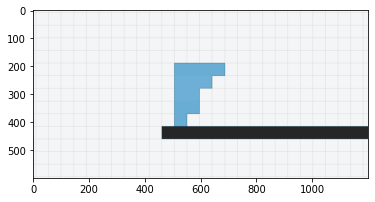

!!!!!!!!!!!!!!!!!!!!!!!! Specie  255 !!!!!!!!!!!!!!!!!!!!!!!!!!!
8345 1.1316209405730602


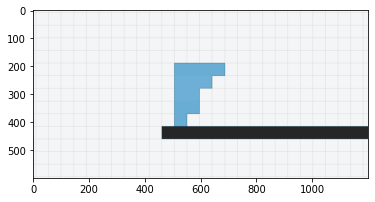

8585 1.0946003139189775


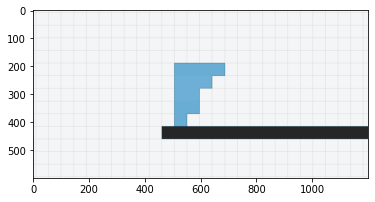

8625 3.49242678836501


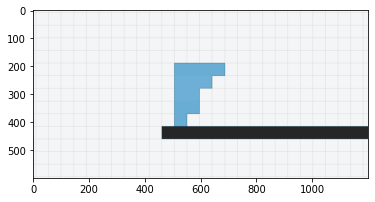

!!!!!!!!!!!!!!!!!!!!!!!! Specie  252 !!!!!!!!!!!!!!!!!!!!!!!!!!!
8545 1.158135160950297


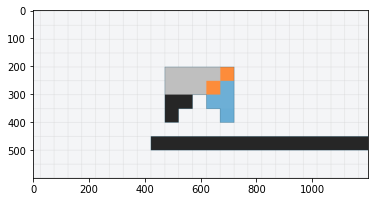

!!!!!!!!!!!!!!!!!!!!!!!! Specie  264 !!!!!!!!!!!!!!!!!!!!!!!!!!!
7979 1.1602760180263567


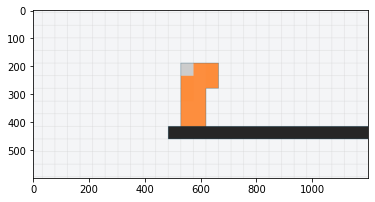

!!!!!!!!!!!!!!!!!!!!!!!! Specie  260 !!!!!!!!!!!!!!!!!!!!!!!!!!!
8554 1.3543704440720372


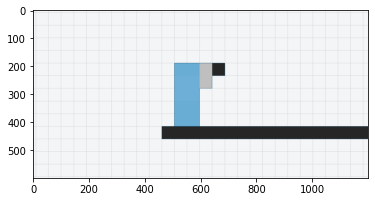

!!!!!!!!!!!!!!!!!!!!!!!! Specie  229 !!!!!!!!!!!!!!!!!!!!!!!!!!!
7994 1.5541988617792502


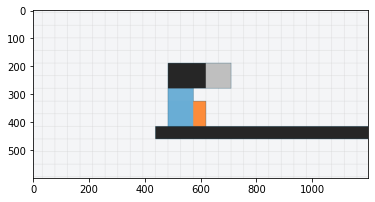

8588 1.1417332437919139


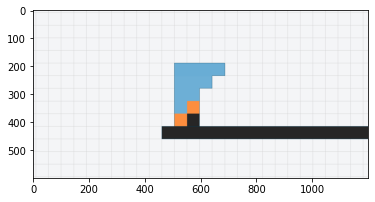

!!!!!!!!!!!!!!!!!!!!!!!! Specie  251 !!!!!!!!!!!!!!!!!!!!!!!!!!!
7998 1.5804626374320552


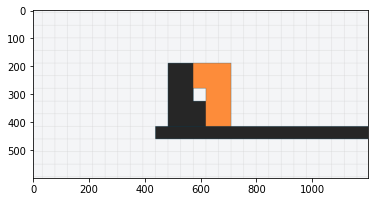

!!!!!!!!!!!!!!!!!!!!!!!! Specie  265 !!!!!!!!!!!!!!!!!!!!!!!!!!!
7980 1.7314734116256103


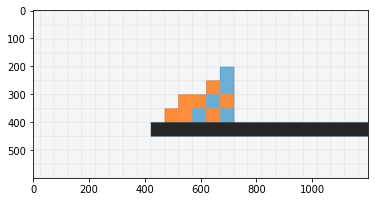

!!!!!!!!!!!!!!!!!!!!!!!! Specie  258 !!!!!!!!!!!!!!!!!!!!!!!!!!!
8590 1.6726201271696963


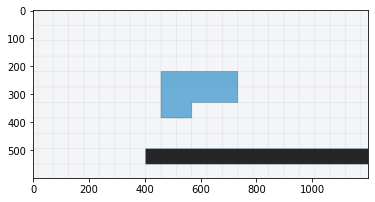

8398 2.0525389459098737


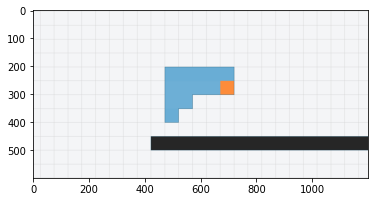

!!!!!!!!!!!!!!!!!!!!!!!! Specie  233 !!!!!!!!!!!!!!!!!!!!!!!!!!!
8244 2.13090335599274


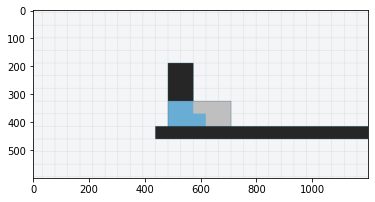

!!!!!!!!!!!!!!!!!!!!!!!! Specie  256 !!!!!!!!!!!!!!!!!!!!!!!!!!!
8289 2.8377559417786964


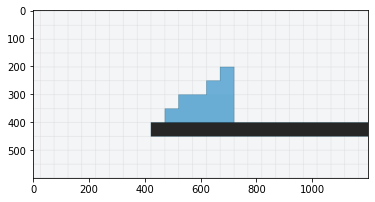

!!!!!!!!!!!!!!!!!!!!!!!! Specie  216 !!!!!!!!!!!!!!!!!!!!!!!!!!!
8348 3.1815144235018704


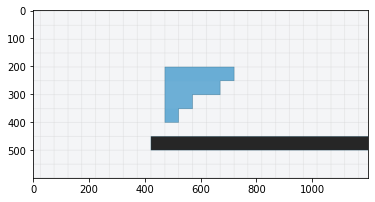

8484 3.0191372180638227


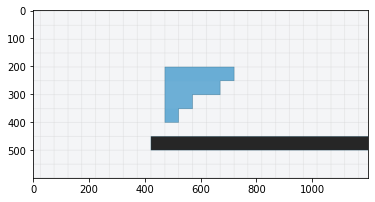

!!!!!!!!!!!!!!!!!!!!!!!! Specie  222 !!!!!!!!!!!!!!!!!!!!!!!!!!!
8335 3.397146367651085


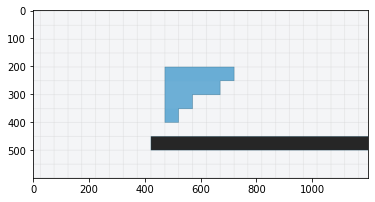

8413 3.175879082053544


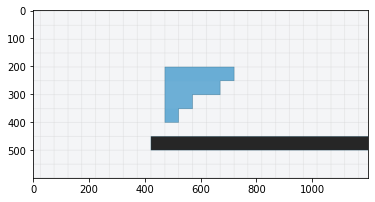

!!!!!!!!!!!!!!!!!!!!!!!! Specie  243 !!!!!!!!!!!!!!!!!!!!!!!!!!!
8640 1.8209560036389603


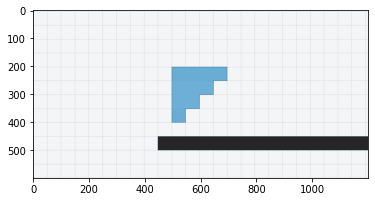

8527 3.460678845585335


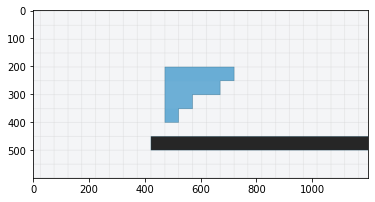

8191 3.515604201056722


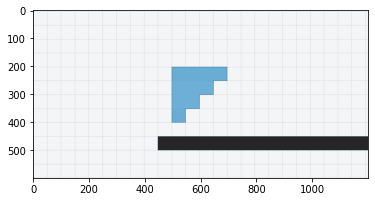

!!!!!!!!!!!!!!!!!!!!!!!! Specie  254 !!!!!!!!!!!!!!!!!!!!!!!!!!!
8021 3.611488334124005


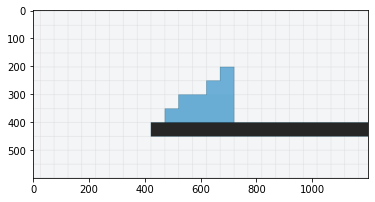

8479 2.9421190709757346


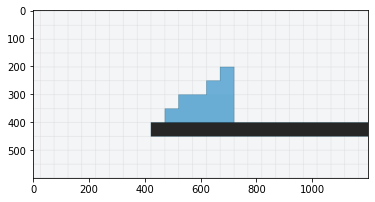

!!!!!!!!!!!!!!!!!!!!!!!! Specie  232 !!!!!!!!!!!!!!!!!!!!!!!!!!!
8483 3.861554661818996


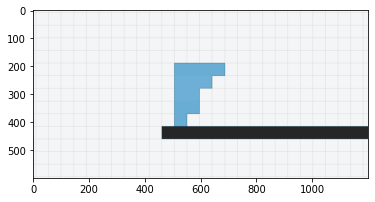

8595 1.00486553524038


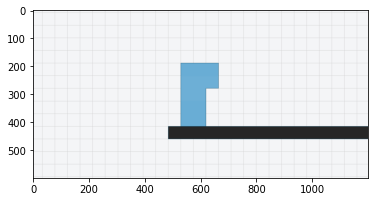

!!!!!!!!!!!!!!!!!!!!!!!! Specie  270 !!!!!!!!!!!!!!!!!!!!!!!!!!!
8075 4.009575716014985


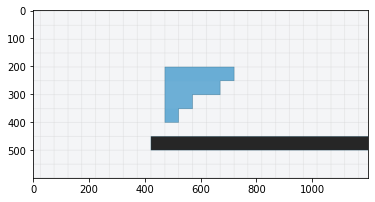

8451 4.385668722406132


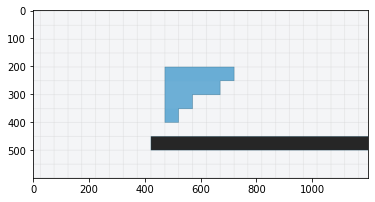

!!!!!!!!!!!!!!!!!!!!!!!! Specie  190 !!!!!!!!!!!!!!!!!!!!!!!!!!!
8485 3.490848347248643


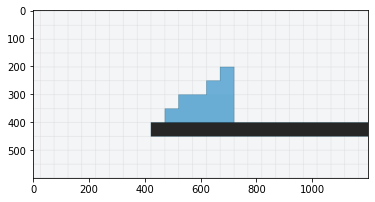

8487 4.892594883364357


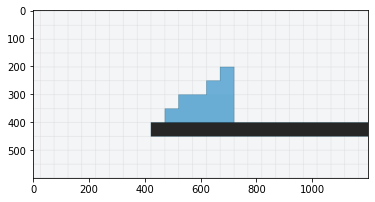

!!!!!!!!!!!!!!!!!!!!!!!! Specie  241 !!!!!!!!!!!!!!!!!!!!!!!!!!!
8355 4.581230658990671


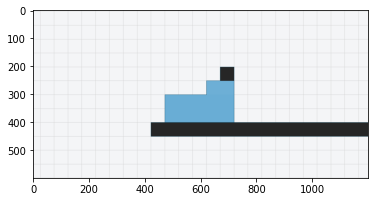

8576 4.970861341570691


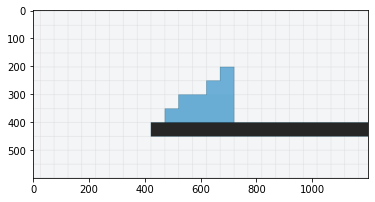

8613 2.6411285604220454


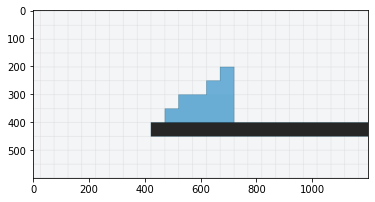

8637 1.0762967849947254


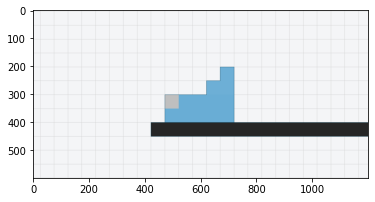

!!!!!!!!!!!!!!!!!!!!!!!! Specie  215 !!!!!!!!!!!!!!!!!!!!!!!!!!!
7976 5.38421348881211


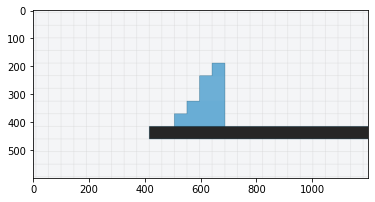

7698 5.275215040375908


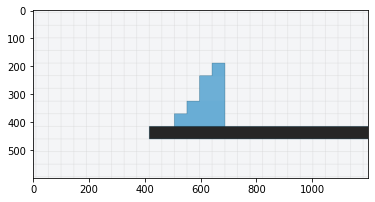

8631 1.9254759093412854


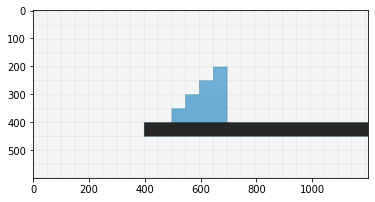

!!!!!!!!!!!!!!!!!!!!!!!! Specie  11 !!!!!!!!!!!!!!!!!!!!!!!!!!!
3519 5.812431667470512


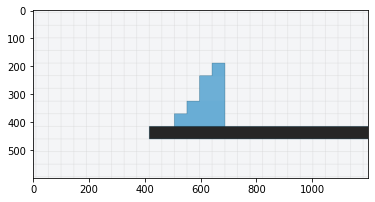

8025 5.246888392852643


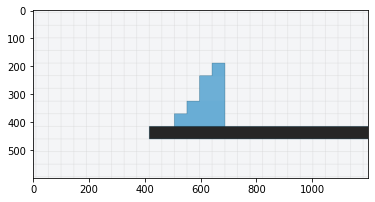

!!!!!!!!!!!!!!!!!!!!!!!! Specie  3 !!!!!!!!!!!!!!!!!!!!!!!!!!!
742 5.8105349680977465


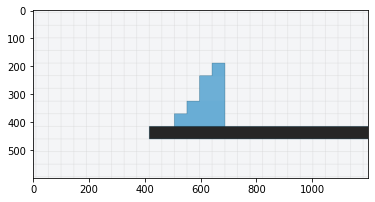

4511 6.342126259652483


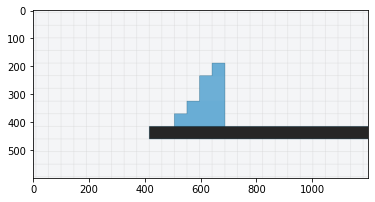

!!!!!!!!!!!!!!!!!!!!!!!! Specie  278 !!!!!!!!!!!!!!!!!!!!!!!!!!!


In [7]:
for k, v in pop.species.species.items():
    print("!!!!!!!!!!!!!!!!!!!!!!!! Specie ", k, "!!!!!!!!!!!!!!!!!!!!!!!!!!!")
    for g in v.members.values():
        if g.fitness != None and g.fitness > 1:
            r, img = get_robot(g, params, neat_config)
            if img is not None:
                print(g.key, g.fitness)
                plt.imshow(img)
                plt.show()

In [10]:
# g = champion
g = pop.population[8545]
params["save_to"] = "flipper_bipedal"
sgr.single_genome_fit(g, params, neat_config, True, False)
# sgr.single_genome_fit(g, params, neat_config, False, True)

(1.158135160950297, True)

SyntaxError: invalid syntax (4073858181.py, line 1)